# Elementary covariance models

An overview of elementary covariance models (1D).

## Import what is required

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import package 'geone'
import geone as gn

In [2]:
# Show version of python and version of geone
import sys 
print(sys.version_info)
print('geone version: ' + gn.__version__)

sys.version_info(major=3, minor=8, micro=13, releaselevel='final', serial=0)
geone version: 1.1.1


### Remark
The matplotlib figures can be visualized in *interactive* mode:
- `%matplotlib notebook`: enable interactive mode
- `%matplotlib inline`: disable interactive mode

## Covariance model

A covariance model is defined by its elementary contributions given as a list of 2-tuples, 
whose the first component is the type given by a string and the second component is a dictionary used to pass the required parameters.
    
    Type             Parameters (dict)
    ----             ----------
    'nugget'         'w' (float) weight
    'spherical'      'w' (float) weight, 'r' (float) range
    'exponential'    'w' (float) weight, 'r' (float) range
    'gaussian'       'w' (float) weight, 'r' (float) range
    'linear'         'w' (float) weight, 'r' (float) range
    'cubic'          'w' (float) weight, 'r' (float) range
    'sinus_cardinal' 'w' (float) weight, 'r' (float) range
    'gamma'          'w' (float) weight, 'r' (float) range, 's' (float) power
    'power'          'w' (float) weight, 'r' (float) scale, 's' (float) power
    'exponential_generalized'
                     'w' (float) weight, 'r' (float) range, 's' (float) power
    'matern'         'w' (float) weight, 'r' (float) scale, 'nu' (float)

Below, each elementary model is illustrated in 1D. 

The classes `geone.covModel.CovModel1D`, `geone.covModel.CovModel2D`, `geone.covModel.CovModel3D` allow to define covariance model with several elementary contributions (with anisotropies and specified orientation in 2D and 3D); see these classes for more details.

## Model: 'spherical', 'exponential', 'gaussian', 'linear', 'cubic'

In [3]:
w = 2.0
r = 10.0
cov_model_sph = gn.covModel.CovModel1D(elem=[('spherical', {'w':w, 'r':10})], name='sph')
cov_model_exp = gn.covModel.CovModel1D(elem=[('exponential', {'w':w, 'r':10})], name='exp')
cov_model_gau = gn.covModel.CovModel1D(elem=[('gaussian', {'w':w, 'r':10})], name='gau')
cov_model_lin = gn.covModel.CovModel1D(elem=[('linear', {'w':w, 'r':10})], name='lin')
cov_model_cub = gn.covModel.CovModel1D(elem=[('cubic', {'w':w, 'r':10})], name='cub')

cov_model_list = [cov_model_sph, cov_model_exp, cov_model_gau, cov_model_lin, cov_model_cub]

In [4]:
# Print sill and range
for cov_model in cov_model_list:
    print(f'Cov. model {cov_model.name}: sill = {cov_model.sill()}, range = {cov_model.r()}')

Cov. model sph: sill = 2.0, range = 10
Cov. model exp: sill = 2.0, range = 10
Cov. model gau: sill = 2.0, range = 10
Cov. model lin: sill = 2.0, range = 10
Cov. model cub: sill = 2.0, range = 10


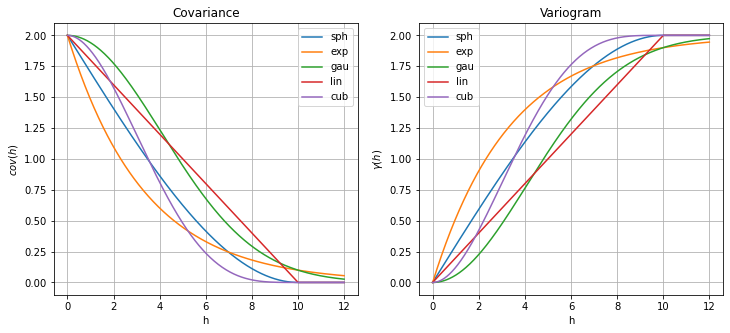

In [5]:
# Plot covariance and variogram
plt.subplots(1,2, figsize=(12,5))

plt.subplot(1,2,1)
# plot covariance
for cov_model in cov_model_list:
    cov_model.plot_model(label=cov_model.name)
plt.legend()
plt.grid(True)
plt.title('Covariance')

plt.subplot(1,2,2)
# plot variogram
for cov_model in cov_model_list:
    cov_model.plot_model(vario=True, label=cov_model.name)
plt.legend()
plt.grid(True)
plt.title('Variogram')
plt.show()

## Model: 'sinus_cardinal'

In [6]:
cov_model_sinc = gn.covModel.CovModel1D(elem=[('sinus_cardinal', {'w':w, 'r':10})], name='sinc')

In [7]:
# Print sill and range
cov_model = cov_model_sinc
print(f'Cov. model {cov_model.name}: sill = {cov_model.sill()}, range = {cov_model.r()}')

Cov. model sinc: sill = 2.0, range = 10


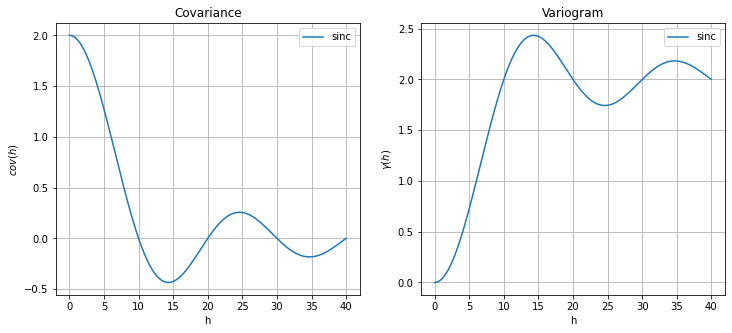

In [8]:
# Plot covariance and variogram
cov_model = cov_model_sinc

plt.subplots(1,2, figsize=(12,5))

plt.subplot(1,2,1)
# plot covariance
cov_model.plot_model(label=cov_model.name, hmax=4.0*cov_model.r())
plt.legend()
plt.grid(True)
plt.title('Covariance')

plt.subplot(1,2,2)
# plot variogram
cov_model.plot_model(vario=True, label=cov_model.name, hmax=4.0*cov_model.r())
plt.legend()
plt.grid(True)
plt.title('Variogram')
plt.show()

## Model: 'gamma'

In [9]:
w = 2.0
r = 10.0
s_list = [0.2, 0.5, 1.0, 2.0, 3.0, 5.0, 10.0]
cov_model_gamma_list = [
    gn.covModel.CovModel1D(elem=[('gamma', {'w':w, 'r':10, 's':s})], name=f'gamma s={s}')
    for s in s_list]

In [10]:
# Print sill and range
for cov_model in cov_model_gamma_list:
    print(f'Cov. model {cov_model.name}: sill = {cov_model.sill()}, range = {cov_model.r()}')

Cov. model gamma s=0.2: sill = 2.0, range = 10
Cov. model gamma s=0.5: sill = 2.0, range = 10
Cov. model gamma s=1.0: sill = 2.0, range = 10
Cov. model gamma s=2.0: sill = 2.0, range = 10
Cov. model gamma s=3.0: sill = 2.0, range = 10
Cov. model gamma s=5.0: sill = 2.0, range = 10
Cov. model gamma s=10.0: sill = 2.0, range = 10


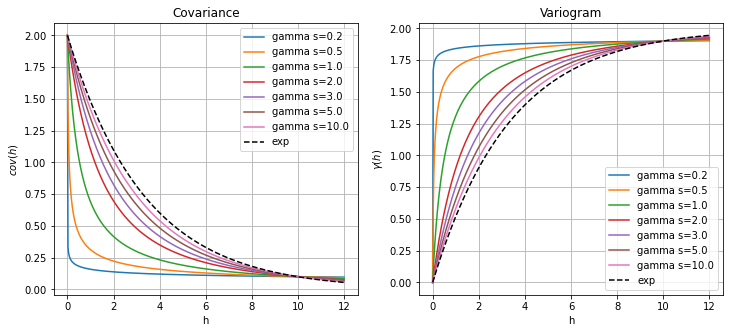

In [11]:
# Plot covariance and variogram
plt.subplots(1,2, figsize=(12,5))

plt.subplot(1,2,1)
# plot covariance
for cov_model in cov_model_gamma_list:
    cov_model.plot_model(label=cov_model.name)
cov_model_exp.plot_model(label=cov_model_exp.name, ls='dashed', color='black')
plt.legend()
plt.grid(True)
plt.title('Covariance')

plt.subplot(1,2,2)
# plot variogram
for cov_model in cov_model_gamma_list:
    cov_model.plot_model(vario=True, label=cov_model.name)
cov_model_exp.plot_model(vario=True, label=cov_model_exp.name, ls='dashed', color='black')
plt.legend()
plt.grid(True)
plt.title('Variogram')
plt.show()

## Model: 'power'

**Warning: this is not a stationary model (does not reach a plateau / sill).**

In [12]:
w = 2.0
r = 10.0
s_list = [0.2, 0.5, 1.0, 2.0, 3.0, 5.0]
cov_model_pow_list = [
    gn.covModel.CovModel1D(elem=[('power', {'w':w, 'r':10, 's':s})], name=f'pow s={s}')
    for s in s_list]

In [13]:
# Print sill and range
for cov_model in cov_model_pow_list:
    print(f'Cov. model {cov_model.name}: sill = {cov_model.sill()}, range = {cov_model.r()}')

Cov. model pow s=0.2: sill = 2.0, range = 10
Cov. model pow s=0.5: sill = 2.0, range = 10
Cov. model pow s=1.0: sill = 2.0, range = 10
Cov. model pow s=2.0: sill = 2.0, range = 10
Cov. model pow s=3.0: sill = 2.0, range = 10
Cov. model pow s=5.0: sill = 2.0, range = 10


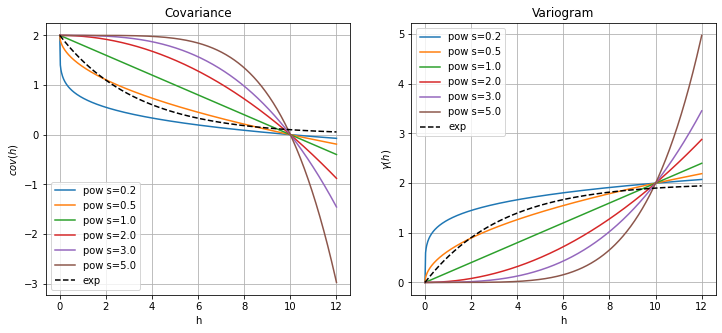

In [14]:
# Plot covariance and variogram
plt.subplots(1,2, figsize=(12,5))

plt.subplot(1,2,1)
# plot covariance
for cov_model in cov_model_pow_list:
    cov_model.plot_model(label=cov_model.name)
cov_model_exp.plot_model(label=cov_model_exp.name, ls='dashed', color='black')
plt.legend()
plt.grid(True)
plt.title('Covariance')

plt.subplot(1,2,2)
# plot variogram
for cov_model in cov_model_pow_list:
    cov_model.plot_model(vario=True, label=cov_model.name)
cov_model_exp.plot_model(vario=True, label=cov_model_exp.name, ls='dashed', color='black')
plt.legend()
plt.grid(True)
plt.title('Variogram')
plt.show()

## Model: 'exponential_generalized'

In [15]:
w = 2.0
r = 10.0
s_list = [0.2, 0.5, 1.0, 2.0, 3.0, 5.0, 10.0]
cov_model_exp_gen_list = [
    gn.covModel.CovModel1D(elem=[('exponential_generalized', {'w':w, 'r':10, 's':s})], name=f'exp gen s={s}')
    for s in s_list]

In [16]:
# Print sill and range
for cov_model in cov_model_exp_gen_list:
    print(f'Cov. model {cov_model.name}: sill = {cov_model.sill()}, range = {cov_model.r()}')

Cov. model exp gen s=0.2: sill = 2.0, range = 10
Cov. model exp gen s=0.5: sill = 2.0, range = 10
Cov. model exp gen s=1.0: sill = 2.0, range = 10
Cov. model exp gen s=2.0: sill = 2.0, range = 10
Cov. model exp gen s=3.0: sill = 2.0, range = 10
Cov. model exp gen s=5.0: sill = 2.0, range = 10
Cov. model exp gen s=10.0: sill = 2.0, range = 10


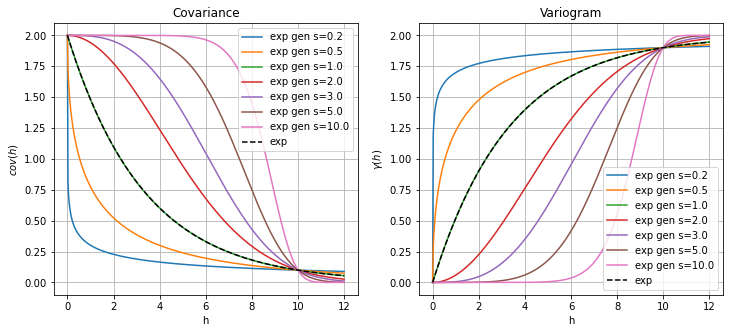

In [17]:
# Plot covariance and variogram
plt.subplots(1,2, figsize=(12,5))

plt.subplot(1,2,1)
# plot covariance
for cov_model in cov_model_exp_gen_list:
    cov_model.plot_model(label=cov_model.name)
cov_model_exp.plot_model(label=cov_model_exp.name, ls='dashed', color='black')
plt.legend()
plt.grid(True)
plt.title('Covariance')

plt.subplot(1,2,2)
# plot variogram
for cov_model in cov_model_exp_gen_list:
    cov_model.plot_model(vario=True, label=cov_model.name)
cov_model_exp.plot_model(vario=True, label=cov_model_exp.name, ls='dashed', color='black')
plt.legend()
plt.grid(True)
plt.title('Variogram')
plt.show()

## Model: 'matern'

**Warning: the range is not equal to the parameter 'r'.**

- Covariance 'matern' with parameters w, r, and nu=0.5 is covariance 'exponential' with parameters w, 3r.
- Covariance 'matern' with parameters w, r, and nu tends to covariance 'gaussian' with parameters w, $\sqrt{6}$ r, when nu tends to infinity.

In [18]:
w = 2.0
r = 10.0
nu_list = [0.2, 0.5, 1.0, 2.0, 3.0, 5.0, 10.0]
cov_model_matern_list = [
    gn.covModel.CovModel1D(elem=[('matern', {'w':w, 'r':10, 'nu':nu})], name=f'matern nu={nu}, r={r}')
    for nu in nu_list]

In [19]:
# Print sill and range (cov_model.r() gives the range)
for cov_model in cov_model_matern_list:
    print(f'Cov. model {cov_model.name}: sill = {cov_model.sill()}, range = {cov_model.r()}')

Cov. model matern nu=0.2, r=10.0: sill = 2.0, range = 31.63139161186625
Cov. model matern nu=0.5, r=10.0: sill = 2.0, range = 29.957322735539908
Cov. model matern nu=1.0, r=10.0: sill = 2.0, range = 28.27382241179835
Cov. model matern nu=2.0, r=10.0: sill = 2.0, range = 26.841876278504646
Cov. model matern nu=3.0, r=10.0: sill = 2.0, range = 26.19786003151972
Cov. model matern nu=5.0, r=10.0: sill = 2.0, range = 25.590039613951095
Cov. model matern nu=10.0, r=10.0: sill = 2.0, range = 25.065105293108747


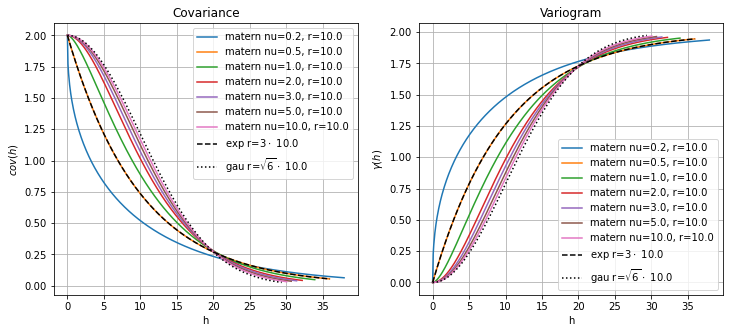

In [20]:
cov_model_expA = gn.covModel.CovModel1D(elem=[('exponential', {'w':w, 'r':3*r})], 
                                        name=r'exp r=$3\cdot$' + f' {r}')
cov_model_gauA = gn.covModel.CovModel1D(elem=[('gaussian', {'w':w, 'r':np.sqrt(6)*r})], 
                                        name=r'gau r=$\sqrt{6}\cdot$' + f' {r}')

# Plot covariance and variogram
plt.subplots(1,2, figsize=(12,5))

plt.subplot(1,2,1)
# plot covariance
for cov_model in cov_model_matern_list:
    cov_model.plot_model(label=cov_model.name)
cov_model_expA.plot_model(label=cov_model_expA.name, ls='dashed', color='black')
cov_model_gauA.plot_model(label=cov_model_gauA.name, ls='dotted', color='black')
plt.legend()
plt.grid(True)
plt.title('Covariance')

plt.subplot(1,2,2)
# plot variogram
for cov_model in cov_model_matern_list:
    cov_model.plot_model(vario=True, label=cov_model.name)
cov_model_expA.plot_model(vario=True, label=cov_model_expA.name, ls='dashed', color='black')
cov_model_gauA.plot_model(vario=True, label=cov_model_gauA.name, ls='dotted', color='black')
plt.legend()
plt.grid(True)
plt.title('Variogram')
plt.show()

### Parameters 'r', 'nu' and "effective" range
The function `geone.covModel.cov_matern_get_r_param(nu, r_eff)` computes the parameter 'r' (scale) such that the 1D-Matern covariance model of parameter 'nu' has an effective range of 'r_eff' (approximately).

In [21]:
r_eff = 10.0
nu_list = [0.2, 0.5, 1.0, 2.0, 3.0, 5.0, 10.0]
r_list = [gn.covModel.cov_matern_get_r_param(nu, r_eff) for nu in nu_list]
for nu, r in zip(nu_list, r_list):
    print(f'nu={nu}, r={r}')

nu=0.2, r=3.1614163937854056
nu=0.5, r=3.3380820069533206
nu=1.0, r=3.5368404930729085
nu=2.0, r=3.725521977764187
nu=3.0, r=3.817105667397543
nu=5.0, r=3.907770425860613
nu=10.0, r=3.989610210314705


/home/julien/anaconda3/envs/py38/lib/python3.8/site-packages/geone/covModel.py:207: RuntimeWarning: invalid value encountered in double_scalars
  u1 = (0.5*u)**nu


In [22]:
cov_model_matern_list2 = [
    gn.covModel.CovModel1D(elem=[('matern', {'w':w, 'r':r, 'nu':nu})], name=f'matern nu={nu}, r={r:4.3f}')
    for nu, r in zip(nu_list, r_list)]

In [23]:
# Print sill and range (cov_model.r() gives the range)
for cov_model in cov_model_matern_list2:
    print(f'Cov. model {cov_model.name}: sill = {cov_model.sill()}, range = {cov_model.r()}')

Cov. model matern nu=0.2, r=3.161: sill = 2.0, range = 10.00000000000001
Cov. model matern nu=0.5, r=3.338: sill = 2.0, range = 9.99999999999994
Cov. model matern nu=1.0, r=3.537: sill = 2.0, range = 10.000000000000073
Cov. model matern nu=2.0, r=3.726: sill = 2.0, range = 10.000000000000002
Cov. model matern nu=3.0, r=3.817: sill = 2.0, range = 10.000000000000151
Cov. model matern nu=5.0, r=3.908: sill = 2.0, range = 9.999999999999964
Cov. model matern nu=10.0, r=3.990: sill = 2.0, range = 9.999999999999982


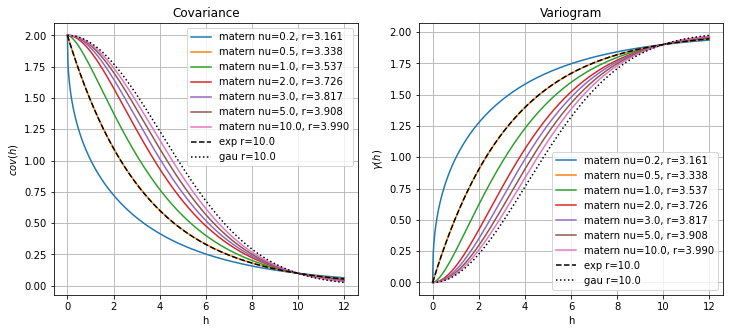

In [24]:
cov_model_expB = gn.covModel.CovModel1D(elem=[('exponential', {'w':w, 'r':r_eff})], name=f'exp r={r_eff}')
cov_model_gauB = gn.covModel.CovModel1D(elem=[('gaussian', {'w':w, 'r':r_eff})], name=f'gau r={r_eff}')

# Plot covariance and variogram
plt.subplots(1,2, figsize=(12,5))

plt.subplot(1,2,1)
# plot covariance
for cov_model in cov_model_matern_list2:
    cov_model.plot_model(label=cov_model.name)
cov_model_expB.plot_model(label=cov_model_expB.name, ls='dashed', color='black')
cov_model_gauB.plot_model(label=cov_model_gauB.name, ls='dotted', color='black')
plt.legend()
plt.grid(True)
plt.title('Covariance')

plt.subplot(1,2,2)
# plot variogram
for cov_model in cov_model_matern_list2:
    cov_model.plot_model(vario=True, label=cov_model.name)
cov_model_expB.plot_model(vario=True, label=cov_model_expB.name, ls='dashed', color='black')
cov_model_gauB.plot_model(vario=True, label=cov_model_gauB.name, ls='dotted', color='black')
plt.legend()
plt.grid(True)
plt.title('Variogram')
plt.show()